In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
file_path = 'E:/UNCC/UNCC ML/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
#sample.head(6)

In [19]:
X_0 = sample.values[:,0]
X_1 = sample.values[:,1]
X_2 = sample.values[:,2]
y = sample.values[:,3]
print('X_0 = ', X_0[:5])
print('X_1 = ', X_1[:5])
print('X_2 = ', X_2[:5])
print('y = ', y[:5])
m = len(X_1)
n = len(y)
print('m = ', m)
print('n = ', n)

X_0 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X_1 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X_2 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100


In [21]:
a_0 = np.ones((m, 1))
a_0[:3]

array([[1.],
       [1.],
       [1.]])

In [23]:
a_x0_1 = X_0.reshape(m,1)
a_x1_1 = X_1.reshape(m,1)
a_x2_1 = X_2.reshape(m,1)
#a_x0_1[:3]
#print(a_x1_1[:3])
#print(a_x2_1[:3])

In [25]:
a_x0 = np.hstack((a_0, a_x0_1,  a_x1_1, a_x2_1))
#a_x1 = np.hstack((a_0, a_x1_1))
#a_x2 = np.hstack((a_0, a_x2_1))
a_x0[:5]
#print(np.transpose(a_x0[:5]))
#print(a_x1[:5])
#print(a_x2[:5])

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [27]:
#w = np.zeros((2,1))
w = np.zeros(4)
w

array([0., 0., 0., 0.])

In [29]:
def error_calculation(a, y, w):
    #print(a[:3])
    #print(w)
    predictions = a.dot(w)
    #print(predictions)
    difference = np.subtract(predictions,y)
    #print(difference)
    error = 1/(2*m)*np.sum(np.square(difference))
    #print(error)
    return error  

In [31]:
error_x0 = error_calculation(a_x0, y, w) 
error_x0
#error_x1 = error_calculation(a_x1, y, w) 
#error_x2 = error_calculation(a_x2, y, w) 
#print(f'The error for given \nX_0 values: {error_x0} \nX_1 values: {error_x1} \nX_2 values: {error_x2}') 

5.524438459196242

In [33]:
def gradient(a, y, w, alpha, iteration):
    m = len(y)
    error_per_iter = np.zeros(iterations)
    for i in range(iterations):
        predictions = a.dot(w)
        difference = np.subtract(predictions,y)
        grad = (alpha/m)*a.transpose().dot(difference)
        w -= grad
        error_per_iter[i] = error_calculation(a, y, w)
    return w, error_per_iter

In [39]:
w = [0., 0., 0., 0.] 
iterations = 1500 
alpha = 0.01 
theta0, iter_history0 = gradient(a_x0, y, w, alpha, iterations) 
print('Final value of theta 0 =', theta0) 
print('iter_history_0 =', iter_history0) 

Final value of theta 0 = [ 4.15118728 -1.8394291   0.72473856 -0.09513266]
iter_history_0 = [5.21542243 4.97171977 4.7765543  ... 0.81079843 0.81065429 0.81051044]


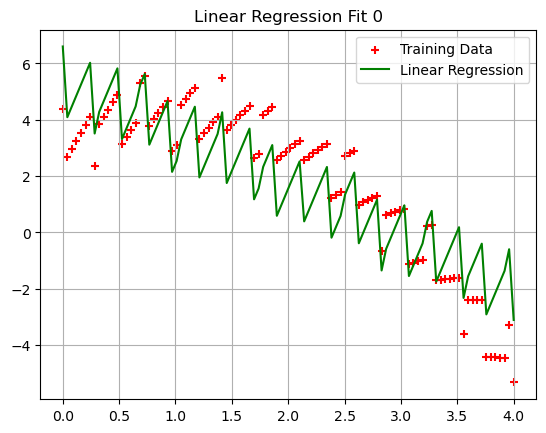

In [41]:
plt.scatter(a_x0[:, 1], y, color='red', marker='+', label='Training Data') 
# Line plot for the linear regression model 
plt.plot(a_x0[:, 1], a_x0.dot(theta0), color='green', label='Linear Regression') 
# Plot customizations 
plt.rcParams["figure.figsize"] = (6, 6) 
plt.grid(True) 
#plt.xlabel('Population of City in 10,000s') 
#plt.ylabel('Profit in $10,000s') 
plt.title('Linear Regression Fit 0') 
plt.legend() 
plt.show() 

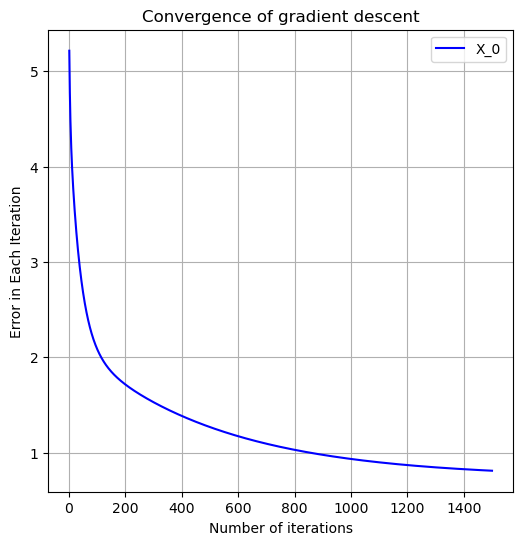

In [43]:
plt.plot(range(1, iterations + 1), iter_history0, color='blue', label='X_0') 
#plt.plot(range(1, iterations + 1), iter_history1, color='green', label='X_1') 
#plt.plot(range(1, iterations + 1), iter_history2, color='red', label='X_2') 
plt.rcParams["figure.figsize"] = (6, 6) 
plt.grid(True) 
plt.xlabel('Number of iterations') 
plt.ylabel('Error in Each Iteration') 
plt.title('Convergence of gradient descent') 
plt.legend() 
plt.show() 

In [61]:
from IPython.display import display 
display(sample) 

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


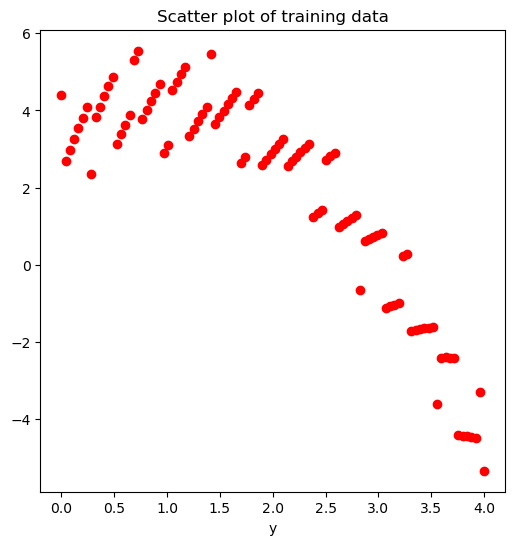

In [62]:
plt.scatter(X_0, y, color = 'red', marker = 'o')
plt.rcParams['figure.figsize'] = (6, 6)
plt.xlabel('X_0')
plt.xlabel('y')
plt.title('Scatter plot of training data')
plt.show()